# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/00.capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/00.capstone/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# Display first 10 records of count_df data
print(count_df.head(10))


   Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4           4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
5           5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E   
6           6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B   
7           7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8   
8           8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0   
9           9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701   

   play_count  
0           1  
1           2  
2           1  
3           1  
4           1  
5           5  
6           1  
7 

In [ ]:
# Display first 10 records of song_df data
print(song_df.head(10))

              song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                B

### **Let us check the data types and and missing values of each column**

In [ ]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**


In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
song_df = song_df.drop_duplicates(subset=['song_id'])
df = pd.merge(count_df, song_df, on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

## Name the obtained dataframe as "df"
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoders
le_user = LabelEncoder()
le_song = LabelEncoder()

# Fit and transform the 'user_id' and 'song_id' columns
df['user_id_encoded'] = le_user.fit_transform(df['user_id'])
df['song_id_encoded'] = le_song.fit_transform(df['song_id'])
df


,user_id,song_id,play_count,title,release,artist_name,year,user_id_encoded,song_id_encoded
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,54961,153
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,54961,413
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,54961,736
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,54961,750
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,54961,1188
...,...,...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0,64590,3660
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009,64590,3736
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007,64590,3744
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010,64590,3893


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 9)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
unique_users = df_final['user_id'].nunique()
print("Total number of unique users:", unique_users)



Total number of unique users: 3155


Total number of unique song id

In [ ]:
# Display total number of unique song_id
unique_songs = df_final['song_id'].nunique()
print("Total number of unique songs:", unique_songs)



Total number of unique songs: 563


Total number of unique artists

In [ ]:
# Display total number of unique artists
unique_artists = df_final['artist_name'].nunique()
print("Total number of unique artists:", unique_artists)


Total number of unique artists: 232


#### **Observations and Insights:__________**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Group by 'song_id' and sum the 'play_count', then sort in descending order
most_interacted_songs = df_final.groupby('song_id')['play_count'].sum().reset_index(name='total_play_count').sort_values(by='total_play_count', ascending=False)

# Merge to get song titles
most_interacted_songs_with_title = pd.merge(most_interacted_songs, song_df[['song_id', 'title']], on='song_id')

# Display the top results with titles
print(most_interacted_songs_with_title.head())


              song_id  total_play_count                           title
0  SOAXGDH12A8C13F8A1              1634  Dog Days Are Over (Radio Edit)
1  SOFRQTD12A81C233C0              1583                   Sehr kosmisch
2  SOWCKVR12A8C142411              1463                    Use Somebody
3  SONYKOW12AB01849C9              1427                         Secrets
4  SOLFXKT12AB017E3E0              1291                       Fireflies


Most interacted users

In [ ]:
# Group by 'user_id' and count unique 'song_id' values
unique_song_interactions = df_final.groupby('user_id')['song_id'].nunique().reset_index(name='unique_song_count').sort_values(by='unique_song_count', ascending=False)

# Display the users with the most unique song interactions
print(unique_song_interactions.head())


                                       user_id  unique_song_count
2547  ce5c912bb8044f23fc0fc31bd986b8d0a7303db5                243
661   34e191b5e3ac4d0b86b100e3325aa46c34998248                227
1561  7c80116b2a5c6602ca60fc40ef932e12fd304a69                202
398   2078b23380f2a80615fb9829621f7dc6cc6c7a82                184
964   4e3398ef89d9c00975d0b0f5b7bc7b7f067c7902                177


#### **Observations and Insights:_______**


Songs released on yearly basis

In [ ]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
  # Group by 'year' and count the number of songs
songs_per_year = song_df.groupby('year').size().reset_index(name='num_songs')

# Display the number of songs released each year
print(songs_per_year)


    year  num_songs
0      0     484284
1   1922          6
2   1924          5
3   1925          7
4   1926         19
..   ...        ...
85  2007      39340
86  2008      34684
87  2009      30966
88  2010       9381
89  2011          1

[90 rows x 2 columns]


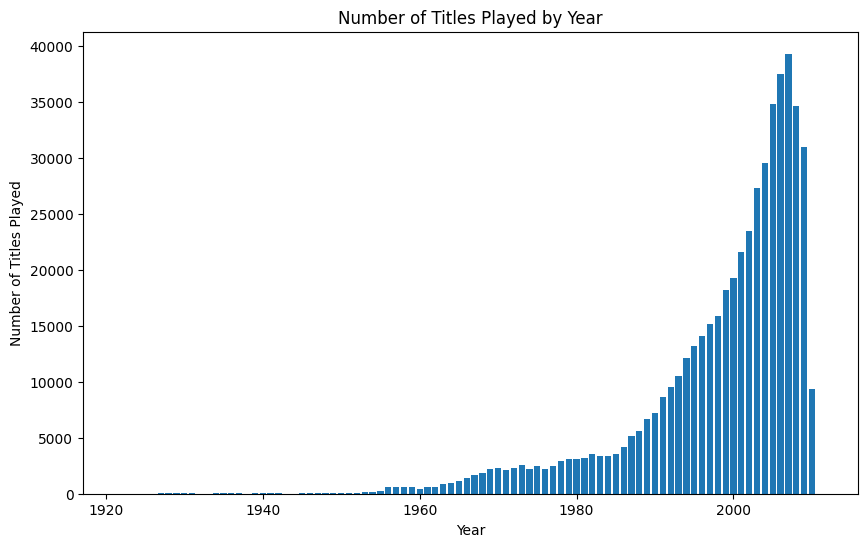

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'songs_per_year' is your DataFrame with 'year' and 'num_songs' columns
# Filter to exclude years with no songs, if not already done
songs_per_year_filtered = songs_per_year[songs_per_year.year > 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(songs_per_year_filtered['year'], songs_per_year_filtered['num_songs'])

# Set the x and y labels
plt.xlabel('Year')
plt.ylabel('Number of Titles Played')

# Optionally, set a title for the plot
plt.title('Number of Titles Played by Year')

# Show the plot
plt.show()


#### **Observations and Insights:__________** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
# Group by 'song_id' and calculate the average 'play_count'
average_play_count_per_song = df_final.groupby('song_id')['play_count'].mean().reset_index(name='average_play_count')

print(average_play_count_per_song.head())


# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
# Group by 'song_id' and count the number of occurrences
play_frequency_per_song = df_final.groupby('song_id').size().reset_index(name='play_frequency')

print(play_frequency_per_song.head())


              song_id  average_play_count
0  SOABJBU12A8C13F63F            1.622642
1  SOABJTC12A58A7DE0E            1.492424
2  SOADJQJ12A8C141D38            1.729216
3  SOADQPP12A67020C82            1.728070
4  SOAFQGA12A8C1367FA            1.452174
              song_id  play_frequency
0  SOABJBU12A8C13F63F             265
1  SOABJTC12A58A7DE0E             132
2  SOADJQJ12A8C141D38             421
3  SOADQPP12A67020C82             114
4  SOAFQGA12A8C1367FA             115


In [ ]:
# Making a dataframe with the average_count and play_freq
# Merge the two dataframes on 'song_id'
final_play = pd.merge(average_play_count_per_song, play_frequency_per_song, on='song_id')


# Let us see the first five records of the final_play dataset
# Display the first five records of the merged dataframe
print(final_play.head())


              song_id  average_play_count  play_frequency
0  SOABJBU12A8C13F63F            1.622642             265
1  SOABJTC12A58A7DE0E            1.492424             132
2  SOADJQJ12A8C141D38            1.729216             421
3  SOADQPP12A67020C82            1.728070             114
4  SOAFQGA12A8C1367FA            1.452174             115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Merge to include song titles in the final_play DataFrame
final_play_with_titles = pd.merge(final_play, song_df[['song_id', 'title']], on='song_id')


In [ ]:
# Build the function to find top n songs
def recommend_top_n_songs(dataframe, n=10, sort_by='play_frequency'):
    """
    Recommend the top n songs from the dataframe.

    Parameters:
    - dataframe: DataFrame containing song information and metrics.
    - n: Number of top songs to return.
    - sort_by: The column name to sort by ('play_frequency' or 'average_play_count').

    Returns:
    - top_n_songs: DataFrame containing the top n songs.
    """
    # Sort the dataframe by the specified column in descending order
    sorted_df = dataframe.sort_values(by=sort_by, ascending=False)

    # Return the top n rows
    top_n_songs = sorted_df.head(n)
    return top_n_songs


In [ ]:
def recommend_top_n_songs_with_titles(dataframe, n=10, sort_by='play_frequency'):
    """
    Recommend the top n songs from the dataframe, including titles.

    Parameters:
    - dataframe: DataFrame containing song information, metrics, and titles.
    - n: Number of top songs to return.
    - sort_by: The column name to sort by ('play_frequency' or 'average_play_count').

    Returns:
    - top_n_songs: DataFrame containing the top n songs with titles.
    """
    # Sort the dataframe by the specified column in descending order
    sorted_df = dataframe.sort_values(by=sort_by, ascending=False)

    # Return the top n rows
    top_n_songs = sorted_df.head(n)
    return top_n_songs


In [ ]:
# Recommend top 10 songs using the function defined above
top_10_songs_by_frequency = recommend_top_n_songs(final_play, n=10, sort_by='play_frequency')

print("Top 10 Songs by Play Frequency:")
print(top_10_songs_by_frequency)


Top 10 Songs by Play Frequency:
                song_id  average_play_count  play_frequency
490  SOWCKVR12A8C142411            1.948069             751
24   SOAXGDH12A8C13F8A1            2.184492             748
136  SOFRQTD12A81C233C0            2.220196             713
70   SOCVTLJ12A6310F0FD            1.817221             662
229  SOKLRPJ12A8C13C3FE            1.930982             652
309  SONYKOW12AB01849C9            2.309061             618
248  SOLFXKT12AB017E3E0            2.119869             609
347  SOPQLBY12A6310E992            1.760726             606
356  SOPXKYD12A6D4FA876            1.758148             583
84   SODJWHY12A8C142CCE            2.119298             570


In [ ]:
top_10_songs_by_average_count = recommend_top_n_songs(final_play, n=10, sort_by='average_play_count')

print("Top 10 Songs by Average Play Count:")
print(top_10_songs_by_average_count)

Top 10 Songs by Average Play Count:
                song_id  average_play_count  play_frequency
403  SOSJSSU12A6D4F8F41            3.373832             107
479  SOVIZNF12AF72A710A            2.625000              96
363  SOQGSUC12A8C13B66D            2.578431             102
559  SOZVVRE12A8C143150            2.486667             150
309  SONYKOW12AB01849C9            2.309061             618
317  SOOGNOZ12AAF3B2936            2.296296             108
487  SOVWBYM12A6D4F8A22            2.235772             123
136  SOFRQTD12A81C233C0            2.220196             713
40   SOBRHVR12A8C133F35            2.218543             151
37   SOBONKR12A58A7A7E0            2.217158             373


In [ ]:
# Recommend top 10 songs by play frequency, including their titles
top_10_songs_by_frequency_with_titles = recommend_top_n_songs_with_titles(final_play_with_titles, n=10, sort_by='play_frequency')

print("Top 10 Songs by Play Frequency (Including Titles):")
print(top_10_songs_by_frequency_with_titles[['title', 'play_frequency']])


Top 10 Songs by Play Frequency (Including Titles):
                              title  play_frequency
490                    Use Somebody             751
24   Dog Days Are Over (Radio Edit)             748
136                   Sehr kosmisch             713
70                           Clocks             662
229                   The Scientist             652
309                         Secrets             618
248                       Fireflies             609
347                Creep (Explicit)             606
356                          Yellow             583
84                 Hey_ Soul Sister             570


In [ ]:
# Recommend top 10 songs by average play count, including their titles
top_10_songs_by_average_count_with_titles = recommend_top_n_songs_with_titles(final_play_with_titles, n=10, sort_by='average_play_count')

print("Top 10 Songs by Average Play Count (Including Titles):")
print(top_10_songs_by_average_count_with_titles[['title', 'average_play_count']])


Top 10 Songs by Average Play Count (Including Titles):
                           title  average_play_count
403        Victoria (LP Version)            3.373832
479              The Big Gundown            2.625000
363           Brave The Elements            2.578431
559                  Greece 2000            2.486667
309                      Secrets            2.309061
317                 Transparency            2.296296
487  Video Killed The Radio Star            2.235772
136                Sehr kosmisch            2.220196
40                     Luvstruck            2.218543
37                You're The One            2.217158


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162740 sha256=0111ebd6ff5a1fb59be4dfe1e60df70577f5063b35734c6afb304bc51d59fc89
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, testset, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
# use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
# Take only "user_id","song_id", and "play_count"
# Load the dataset from the DataFrame
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
# Take test_size = 0.4, random_state = 42
# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)


**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {
    'name': 'cosine',  # similarity measure
    'user_based': True  # compute similarities between users
}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options, random_state=1, verbose=True)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)
predictions = sim_user_user.test(testset)
# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user, testset, k=30, threshold=1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
# Select one random row from df_final
random_row = df_final.sample(n=1)

# Extract user_id and song_id from the random row
random_user_id = random_row['user_id'].iloc[0]
random_song_id = random_row['song_id'].iloc[0]

print(f"Random user_id: {random_user_id}")
print(f"Random song_id: {random_song_id}")


Random user_id: 2de02e24abfe4d1eedd6c6f431bbea8d1df8391b
Random song_id: SOKMHKY12AF72AB079


In [ ]:
# Make a prediction for the user-song pair
prediction = sim_user_user.predict(random_user_id, random_song_id)

# The estimated 'rating' is the predicted play count for this user-song pair
predicted_play_count = prediction.est

print(f"Predicted play count for user {random_user_id} and song {random_song_id}: {predicted_play_count}")

Predicted play count for user 2de02e24abfe4d1eedd6c6f431bbea8d1df8391b and song SOKMHKY12AF72AB079: 1.7


In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

# Select a random user
random_user = df_final['user_id'].sample(n=1).iloc[0]

# Find songs that this user has not listened to
listened_songs = set(df_final[df_final['user_id'] == random_user]['song_id'])
all_songs = set(df_final['song_id'])
not_listened_songs = all_songs - listened_songs

# Pick a random song from the set of not listened songs
import random
random_song = random.sample(not_listened_songs, 1)[0]

print(f"Sample user_id: {random_user}")
print(f"Sample song_id (not listened by user): {random_song}")

# Assuming 'sim_user_user' is your trained recommendation model
prediction = sim_user_user.predict(random_user, random_song)

# The estimated 'rating' is the predicted play count for this user-song pair
predicted_play_count = prediction.est

print(f"Predicted play count for user {random_user} and song {random_song}: {predicted_play_count}")


Sample user_id: e0dc9c4ddf5dfd341ab21610ca4563e88e901988
Sample song_id (not listened by user): SOAUXEN12A81C23960
Predicted play count for user e0dc9c4ddf5dfd341ab21610ca4563e88e901988 and song SOAUXEN12A81C23960: 1.7070591581131893


**Observations and Insights:_________**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)


# Best RMSE score
# Print the best RMSE score
print(f"Best RMSE score: {gs.best_score['rmse']}")


# Combination of parameters that gave the best RMSE score
# Print the combination of parameters that gave the best RMSE score
print(f"Best parameters: {gs.best_params['rmse']}")



Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

In [ ]:
best_params = {
    'k': 40,
    'min_k': 9,
    'sim_options': {
        'name': 'pearson_baseline',
        'user_based': True,
        'min_support': 2
    }
}

In [ ]:
# Train the best model found in above gridsearch
# Initialize the best model
best_model = KNNBasic(k=best_params['k'], min_k=best_params['min_k'],
                      sim_options=best_params['sim_options'])

# Since you're using the entire dataset to train, you can build a full trainset
trainset = data.build_full_trainset()

# Train the model
best_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Observations and Insights:_________**

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
# Convert user_id and song_id to string if they are numeric
user_id_str = str(6958)
song_id_str = str(1671)
true_rating = 2  # This represents the actual play count the user has for this song

# Make a prediction for the given user-song pair
prediction = best_model.predict(user_id_str, song_id_str, r_ui=true_rating, verbose=True)

# The estimated 'rating' is the predicted play count for this user-song pair
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count:.2f}")
print(f"Actual play count (r_ui): {true_rating}")


user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
Predicted play count for user 6958 and song 1671: 1.70
Actual play count (r_ui): 2


In [ ]:
import random

# Predict the play count for a song that is not listened to by the user (with user_id 6958)
listened_songs = set(df_final[df_final['user_id'] == '6958']['song_id'])
all_songs = set(df_final['song_id'])
not_listened_songs = all_songs - listened_songs


random_song_not_listened = random.sample(not_listened_songs, 1)[0]

# Assuming 'best_model' is your trained model
prediction = best_model.predict('6958', random_song_not_listened)
predicted_play_count = prediction.est

print(f"Predicted play count for user 6958 and randomly selected unlistened song {random_song_not_listened}: {predicted_play_count}")


Predicted play count for user 6958 and randomly selected unlistened song SOWCBKV12AC90732A6: 1.7000576877396587


**Observations and Insights:______________**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
from surprise import KNNBasic, Dataset, Reader

# Example setup (adjust according to your actual setup)
sim_options = {'name': 'cosine', 'user_based': False}  # item-based similarity
model = KNNBasic(sim_options=sim_options)

# Assuming 'data' is your dataset
trainset = data.build_full_trainset()
model.fit(trainset)



Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
import numpy as np

# Get the item-item similarity matrix
similarity_matrix = model.compute_similarities()

# Get the 5 nearest neighbors of the item with inner id 0
# Note: Depending on the similarity measure, you might want to sort in descending order (for similarity)
# or ascending order (for distance)
nearest_neighbors = np.argsort(similarity_matrix[0])[-6:-1]  # Excludes the item itself

print(f"5 Nearest neighbors (inner ids) of the song with inner id 0: {nearest_neighbors}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
5 Nearest neighbors (inner ids) of the song with inner id 0: [241 243 419 418 508]


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
from collections import defaultdict

def get_recommendations(data, user_id, top_n, algo):
    """
    Recommend top N songs for a given user based on predicted play counts.

    Parameters:
    - data: DataFrame containing the song dataset with columns ['user_id', 'song_id', 'play_count'].
    - user_id: The user ID for whom to make recommendations.
    - top_n: The number of top recommendations to return.
    - algo: The prediction algorithm object already trained.

    Returns:
    - top_n_recommendations: List of tuples with the top N recommended song IDs and their predicted play counts.
    """
    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Create a set of all song_ids
    all_songs = set(data['song_id'])

    # Find songs the user has interacted with
    played_songs = set(data[data['user_id'] == user_id]['song_id'])

    # Songs the user has not played yet
    not_played_songs = all_songs - played_songs

    # Predict play counts for songs not played by the user
    for song_id in not_played_songs:
        # Predicting the play count for those non played song ids by this user
        predicted_play_count = algo.predict(user_id, song_id).est

        # Appending the predicted play_counts along with song_id
        recommendations.append((song_id, predicted_play_count))

    # Sorting the predicted play_counts in descending order and take top N
    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_n_recommendations = recommendations[:top_n]

    return top_n_recommendations


In [ ]:
import random

# Assuming 'data' is your DataFrame containing user interactions
random_user_id = random.choice(df_final['user_id'].unique())
print(f"Randomly selected user_id: {random_user_id}")


Randomly selected user_id: 60a85d6d80cfea07e64ff556112ef845932e197b


In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
# Make top 5 recommendations
top_5_recommendations = get_recommendations(df_final, random_user_id, 5, model)

print(f"Top 5 recommended songs for user {random_user_id}:")
for song_id, predicted_play_count in top_5_recommendations:
    print(f"Song ID: {song_id}, Predicted Play Count: {predicted_play_count}")


Top 5 recommended songs for user 60a85d6d80cfea07e64ff556112ef845932e197b:
Song ID: SOIIYYX12A58A7BF1F, Predicted Play Count: 1.7336449888385648
Song ID: SOHTQAS12A6701C7BA, Predicted Play Count: 1.7143769697066167
Song ID: SOQHWMN12A6701E2D9, Predicted Play Count: 1.6799636397540045
Song ID: SOKVZHI12A58A7A13E, Predicted Play Count: 1.6726449140232178
Song ID: SOPREHY12AB01815F9, Predicted Play Count: 1.6606164311905278


In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
import pandas as pd

# Assuming top_5_recommendations contains your top 5 recommended song IDs and their predicted play counts
top_5_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

print(top_5_df)


              song_id  predicted_play_count
0  SOIIYYX12A58A7BF1F              1.733645
1  SOHTQAS12A6701C7BA              1.714377
2  SOQHWMN12A6701E2D9              1.679964
3  SOKVZHI12A58A7A13E              1.672645
4  SOPREHY12AB01815F9              1.660616


**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count_df):
    # Convert recommendations to DataFrame for easy handling
    recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

    # Ensure 'playing_count_df' is filtered correctly by 'song_id' present in 'recommendations_df'
    ranked_songs = playing_count_df[playing_count_df['song_id'].isin(recommendations_df['song_id'])]

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(recommendations_df, on='song_id', how='inner')

    # Correct play counts based on some logic
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

    # Sort the songs based on corrected play_counts in descending order
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    return ranked_songs


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Assuming playing_count is a dictionary
playing_count_df = pd.DataFrame(list(playing_count.items()), columns=['song_id', 'play_freq'])


In [ ]:
playing_count_df.head()

,song_id,play_freq
0,SOAARXR12A8C133D15,32
1,SOACPBY12A8C13FEF9,59
2,SOAKHOF12A8C13C72A,88
3,SOAVIJW12AB018269B,96
4,SOBDVAK12AC90759A2,143


In [ ]:
ranked_songs_df = ranking_songs(top_5_recommendations, playing_count_df)

# Display the ranked songs DataFrame
print(ranked_songs_df)

              song_id  play_freq  predicted_play_count  corrected_play_count
1  SOIIYYX12A58A7BF1F        126              1.733645              1.644558
4  SOHTQAS12A6701C7BA        144              1.714377              1.631044
2  SOKVZHI12A58A7A13E        203              1.672645              1.602459
0  SOPREHY12AB01815F9        242              1.660616              1.596334
3  SOQHWMN12A6701E2D9        131              1.679964              1.592593


**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
from surprise import KNNBasic, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Configure the algorithm for item-based collaborative filtering
sim_options = {
    'name': 'cosine',
    'user_based': False,  # Compute similarities between items
    'min_support': 5,  # Minimum number of common users for similarity to be considered
}

algo = KNNBasic(sim_options=sim_options, random_state=1)


In [ ]:
# Perform cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0225  1.0288  1.0260  1.0189  1.0328  1.0258  0.0048  
MAE (testset)     0.7544  0.7606  0.7583  0.7555  0.7656  0.7589  0.0040  
Fit time          0.25    0.20    0.21    0.20    0.20    0.21    0.02    
Test time         1.63    1.53    1.85    1.57    1.55    1.63    0.12    


{'test_rmse': array([1.02250507, 1.02882157, 1.02597322, 1.01893838, 1.03281473]),
 'test_mae': array([0.75441959, 0.76061902, 0.75829131, 0.75549836, 0.76558091]),
 'fit_time': (0.254718542098999,
  0.1991560459136963,
  0.20646405220031738,
  0.19956302642822266,
  0.20071744918823242),
 'test_time': (1.6250035762786865,
  1.5287315845489502,
  1.85371994972229,
  1.574249267578125,
  1.5481669902801514)}

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict on the test set
predictions = algo.test(testset)

# Compute and print the RMSE
accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0229


1.0228574616083013

**Observations and Insights:______________**

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
# Convert user_id and song_id to the appropriate format if they are not strings
user_id_str = str(6958)
song_id_str = str(1671)

# Use the trained model to predict the play count for the user-song pair
prediction = algo.predict(user_id_str, song_id_str)

# The estimated rating is the model's prediction for the play count
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count}")

Predicted play count for user 6958 and song 1671: 1.700031813361612


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
listened_users = df_final[df_final['song_id'] == '1671']['user_id'].unique()

all_users = df_final['user_id'].unique()
not_listened_users = [user for user in all_users if user not in listened_users]

random_user_not_listened = random.choice(not_listened_users)
print(f"Random user who has not listened to song 1671: {random_user_not_listened}")


Random user who has not listened to song 1671: 0b27fa6a9c8635b57c9ed765b6e8324870205c79


In [ ]:
# Assuming 'algo' is your trained KNNBasic model for item-item similarity
# Assuming 'song_id_str' is set to '1671' for the song of interest
song_id_str = str(1671)

# Let's choose a user who has not listened to song_id 1671
# For demonstration, this is a hypothetical user_id; replace it with a real one from your dataset
user_id_str = "0b27fa6a9c8635b57c9ed765b6e8324870205c79"

# Use the trained model to predict the play count for the unseen user-song pair
prediction = algo.predict(user_id_str, song_id_str)

# The estimated rating is the model's prediction for the play count
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count}")


Predicted play count for user 0b27fa6a9c8635b57c9ed765b6e8324870205c79 and song 1671: 1.700031813361612


**Observations and Insights:______________**

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# Fitting the data
gs.fit(data)

# Best RMSE score
print(f"Best RMSE: {gs.best_score['rmse']}")

# Extract the combination of parameters that gave the best RMSE score
print(f"Best parameters: {gs.best_params['rmse']}")

Best RMSE: 1.0242948800760245
Best parameters: {'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
# Best parameters from grid search
best_sim_options = {
    'name': 'pearson_baseline',
    'user_based': False,
    'min_support': 2
}
best_k = 30
best_min_k = 6

# Configure the model with the best parameters
best_model = KNNBasic(k=best_k, min_k=best_min_k, sim_options=best_sim_options)

# Load the full dataset for training
trainset = data.build_full_trainset()

# Train the best model
best_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Observations and Insights:______________**

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
user_id = '6958'  # Replace with an actual user ID
song_id = '1671'  # Replace with an actual song ID

prediction = best_model.predict(user_id, song_id)
print(f"Predicted play count for user {user_id} and song {song_id}: {prediction.est}")

Predicted play count for user 6958 and song 1671: 1.7000576877396587


In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
user_id = '6958'  # Replace with an actual user ID
song_id = '3232'  # Replace with an actual song ID

prediction = best_model.predict(user_id, song_id)
print(f"Predicted play count for user {user_id} and song {song_id}: {prediction.est}")

Predicted play count for user 6958 and song 3232: 1.7000576877396587


In [ ]:
from surprise.accuracy import rmse

In [ ]:
# Predict on the test set
predictions = best_model.test(testset)

# Compute RMSE
rmse(predictions)

RMSE: 0.4743


0.4743313238836268

**Observations and Insights:______________**

In [ ]:
# Find five most similar items to the item with inner id 0
similarity_matrix = best_model.compute_similarities()

# Retrieve the similarities for item with inner id 0
similarities = similarity_matrix[0]

# Get the top 5 most similar item indices (excluding the item itself)
# Argsort returns indices that would sort an array, so we take the last 6 indices and skip the last one (the item itself)
most_similar_indices = similarities.argsort()[-6:-1]

# The above line picks the indices of the 5 most similar items, excluding the item itself which is the most similar
print("Indices of the 5 most similar items to item 0:", most_similar_indices)

# If you want to translate these inner ids back to raw ids (the original ids in your dataset)
most_similar_raw_ids = [best_model.trainset.to_raw_iid(inner_id) for inner_id in most_similar_indices]
print("Raw IDs of the 5 most similar items to item 0:", most_similar_raw_ids)

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Indices of the 5 most similar items to item 0: [371 286  15 489   7]
Raw IDs of the 5 most similar items to item 0: ['SOBZFSZ12A8C13F2CA', 'SOSACAB12AB01876E4', 'SOFXJCS12A58A7DF02', 'SOCLANN12AC907598C', 'SODUANR12A6D4F5036']


In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
user_id = '6958'  # replace with the actual user ID you're interested in

# Find items the user has interacted with
user_items = set(df_final[df_final['user_id'] == user_id]['song_id'])

# Find all unique items in the dataset
all_items = set(df_final['song_id'])

# Identify items not interacted with by the user
items_to_predict = all_items - user_items

In [ ]:
predictions = []
for item_id in items_to_predict:
    prediction = best_model.predict(user_id, item_id)
    predictions.append((item_id, prediction.est))

In [ ]:
# Sort the predictions by estimated play count in descending order
predictions.sort(key=lambda x: x[1], reverse=True)

# Select top 5
top_5_recommendations = predictions[:5]

print(f"Top 5 recommended items for user {user_id}:")
for item_id, predicted_play_count in top_5_recommendations:
    print(f"Item ID: {item_id}, Predicted Play Count: {predicted_play_count}")


Top 5 recommended items for user 6958:
Item ID: SOBOUPA12A6D4F81F1, Predicted Play Count: 1.7000576877396587
Item ID: SOKNWRZ12A8C13BF62, Predicted Play Count: 1.7000576877396587
Item ID: SOONUTJ12A6701D7B4, Predicted Play Count: 1.7000576877396587
Item ID: SOPCTBB12AF72A1B64, Predicted Play Count: 1.7000576877396587
Item ID: SOYGHOJ12A6701FFBA, Predicted Play Count: 1.7000576877396587


In [ ]:
top_5_recommendations


[('SOBOUPA12A6D4F81F1', 1.7000576877396587),
 ('SOKNWRZ12A8C13BF62', 1.7000576877396587),
 ('SOONUTJ12A6701D7B4', 1.7000576877396587),
 ('SOPCTBB12AF72A1B64', 1.7000576877396587),
 ('SOYGHOJ12A6701FFBA', 1.7000576877396587)]

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"

top_5_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

print(top_5_df)

              song_id  predicted_play_count
0  SOBOUPA12A6D4F81F1              1.700058
1  SOKNWRZ12A8C13BF62              1.700058
2  SOONUTJ12A6701D7B4              1.700058
3  SOPCTBB12AF72A1B64              1.700058
4  SOYGHOJ12A6701FFBA              1.700058


In [ ]:
# Applying the ranking_songs function
ranked_songs_df = ranking_songs(top_5_df, playing_count_df)

# Display the ranked songs DataFrame
print(ranked_songs_df)

              song_id  play_freq  predicted_play_count  corrected_play_count
4  SOBOUPA12A6D4F81F1        436              1.700058              1.652166
2  SOYGHOJ12A6701FFBA        234              1.700058              1.634686
1  SOPCTBB12AF72A1B64        229              1.700058              1.633976
3  SOKNWRZ12A8C13BF62        225              1.700058              1.633391
0  SOONUTJ12A6701D7B4        137              1.700058              1.614622


**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy


In [ ]:
# Define a Reader specifying the rating scale
reader = Reader(rating_scale=(0,5))

# Load the dataset from the DataFrame
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)


In [ ]:
# Build baseline model using svd
trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

In [ ]:
# Initialize the SVD model
svd = SVD(random_state=1)

# Train the SVD model on the training set
svd.fit(trainset)

In [ ]:
# Test the model on the test set
predictions = svd.test(testset)

# Compute and print Root Mean Squared Error (RMSE)
accuracy.rmse(predictions)

RMSE: 1.0106


1.0105987841668604

In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
# Assuming 'svd' is your trained SVD model

# Convert user_id and song_id to the appropriate format (string) if they're not already
user_id_str = str(6958)  # or directly "6958" if it's already a string
song_id_str = str(1671)  # or directly "1671" if it's already a string
r_ui = 2  # The actual rating provided by the user

# Make a prediction
prediction = svd.predict(user_id_str, song_id_str, r_ui=r_ui)

# The estimated rating (predicted play count) is stored in 'est'
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count}")
print(f"Actual rating (r_ui): {r_ui}")


Predicted play count for user 6958 and song 1671: 1.700031813361612
Actual rating (r_ui): 2


In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
# Convert user_id and song_id to string if they are not already
user_id_str = str(6958)  # Ensuring the user_id is in string format
song_id_str = str(3232)  # The new song_id for the song not listened to by the user

# Make a prediction using the trained SVD model
prediction = svd.predict(user_id_str, song_id_str)

# The estimated rating (predicted play count) is the model's guess for this user-item interaction
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str} (not previously listened to): {predicted_play_count}")


Predicted play count for user 6958 and song 3232 (not previously listened to): 1.700031813361612


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Assuming 'data' is your dataset loaded into a surprise Dataset object
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Fit the data
gs.fit(data)


# Best RMSE score
print(f"Best RMSE: {gs.best_score['rmse']}")

# Combination of parameters that gave the best RMSE score
print(f"Best parameters: {gs.best_params['rmse']}")


Best RMSE: 1.0118225359617048
Best parameters: {'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
# Example optimal hyperparameters
optimal_n_epochs = 30
optimal_lr_all = 0.01
optimal_reg_all = 0.2

# Initialize the SVD model with the optimal hyperparameters
svd_algo_optimized = SVD(n_epochs=optimal_n_epochs, lr_all=optimal_lr_all, reg_all=optimal_reg_all, random_state=1)

trainset = data.build_full_trainset()

# Train the optimized model
svd_algo_optimized.fit(trainset)

**Observations and Insights:_________**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
# Making a prediction for a user and an item
user_id = '6958'  # Replace with an actual user ID
item_id = '1671'  # Replace with an actual item ID

# Predict
prediction = svd_algo_optimized.predict(user_id, item_id)
print(f"Predicted rating for user {user_id} and item {item_id}: {prediction.est}")

Predicted rating for user 6958 and item 1671: 1.7000576877396587


In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
user_id_str = str(6958)  # Ensuring the user_id is in string format
song_id_str = str(3232)  # The song_id for the song not listened to by the user

# Make a prediction for the specified user and song
prediction = svd_algo_optimized.predict(user_id_str, song_id_str)

# The estimated rating (predicted play count) is the model's guess for this user-item interaction
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count}")


Predicted play count for user 6958 and song 3232: 1.7000576877396587


**Observations and Insights:_________**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_algo_optimized" algorithm
all_songs = set(df_final['song_id'])

user_songs = set(df_final[df_final['user_id'] == '6958']['song_id'])

songs_to_predict = all_songs - user_songs

predictions = []
for song_id in songs_to_predict:
    prediction = svd_algo_optimized.predict('6958', song_id)
    predictions.append((song_id, prediction.est))

top_5_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Recommendations for User 6958:")
for song_id, est_play_count in top_5_predictions:
    print(f"Song ID: {song_id}, Predicted Play Count: {est_play_count}")


Top 5 Recommendations for User 6958:
Song ID: SOSJSSU12A6D4F8F41, Predicted Play Count: 2.968341176355909
Song ID: SOQGSUC12A8C13B66D, Predicted Play Count: 2.38044780145379
Song ID: SOOGNOZ12AAF3B2936, Predicted Play Count: 2.297231787264374
Song ID: SOVIZNF12AF72A710A, Predicted Play Count: 2.2890939844361675
Song ID: SONYKOW12AB01849C9, Predicted Play Count: 2.2718514470796496


In [ ]:

# Convert the list of recommendations to a DataFrame for better presentation and further analysis
ranked_songs_df = pd.DataFrame(top_5_predictions, columns=['Song ID', 'Predicted Play Count'])
ranked_songs_df['Rank'] = ranked_songs_df['Predicted Play Count'].rank(ascending=False)

print(ranked_songs_df)


              Song ID  Predicted Play Count  Rank
0  SOSJSSU12A6D4F8F41              2.968341   1.0
1  SOQGSUC12A8C13B66D              2.380448   2.0
2  SOOGNOZ12AAF3B2936              2.297232   3.0
3  SOVIZNF12AF72A710A              2.289094   4.0
4  SONYKOW12AB01849C9              2.271851   5.0


**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Make baseline clustering model

# Creating a user-song interaction matrix
interaction_matrix = df_final.pivot_table(index='user_id', columns='song_id', values='play_count').fillna(0)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(interaction_matrix)

# Assuming we choose k after analysis
k = 5  # Example value, adjust based on your analysis

# Initializing and fitting the K-Means model
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster labels back to the original user-item matrix
interaction_matrix['cluster'] = clusters

def recommend_songs_for_user(user_id, interaction_matrix, top_n=5):
    # Find the cluster the user belongs to
    user_cluster = interaction_matrix.loc[user_id, 'cluster']

    # Filter users from the same cluster
    similar_users = interaction_matrix[interaction_matrix['cluster'] == user_cluster]

    # Aggregate play counts across similar users and sort
    song_recommendations = similar_users.drop('cluster', axis=1).mean().sort_values(ascending=False)

    # Filter out songs the user has already interacted with
    known_songs = interaction_matrix.loc[user_id]
    known_songs = known_songs[known_songs > 0].index.tolist()

    recommendations = song_recommendations[~song_recommendations.index.isin(known_songs)]

    return recommendations.head(top_n).index.tolist()

# Example: Recommend songs for a user
user_id = '0b27fa6a9c8635b57c9ed765b6e8324870205c79'  # Replace with an actual user ID
recommended_songs = recommend_songs_for_user(user_id, interaction_matrix)
print(f"Recommended songs for user {user_id}: {recommended_songs}")



Recommended songs for user 0b27fa6a9c8635b57c9ed765b6e8324870205c79: ['SONYKOW12AB01849C9', 'SOWCKVR12A8C142411', 'SOLFXKT12AB017E3E0', 'SODJWHY12A8C142CCE', 'SOKLRPJ12A8C13C3FE']


In [ ]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year,user_id_encoded,song_id_encoded
200,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000,6958,447
202,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,6958,512
203,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,6958,549
204,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,6958,703
205,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,6958,719
...,...,...,...,...,...,...,...,...,...
1999734,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXNZOW12AB017F756,1,Half Of My Heart,Battle Studies,John Mayer,0,47786,9139
1999736,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXQYSC12A6310E908,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,47786,9186
1999745,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYDTIW12A67ADAFC9,2,The Police And The Private,Live It Out,Metric,2005,47786,9351
1999755,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYQQAC12A6D4FD59E,1,Just Friends,Back To Black,Amy Winehouse,2006,47786,9543


In [ ]:
def decode_user_id(encoded_id, df):
    """
    Decode an encoded user ID back to the original user ID.

    :param encoded_id: The encoded user ID.
    :param df: The DataFrame containing the mappings between original and encoded IDs.
    :return: The original user ID.
    """
    # Find the row in the DataFrame where user_id_encoded matches the encoded_id
    original_id_row = df[df['user_id_encoded'] == encoded_id]

    # Extract the original user_id
    # Use .iloc[0] to get the first match, assuming unique encoding
    if not original_id_row.empty:
        return original_id_row['user_id'].iloc[0]
    else:
        return None  # Or handle the case where the mapping is not found

def decode_song_id(encoded_id, df):
    """
    Decode an encoded song ID back to the original song ID.

    :param encoded_id: The encoded song ID.
    :param df: The DataFrame containing the mappings between original and encoded IDs.
    :return: The original song ID.
    """
    # Find the row in the DataFrame where song_id_encoded matches the encoded_id
    original_id_row = df[df['song_id_encoded'] == encoded_id]

    # Extract the original song_id
    # Use .iloc[0] to get the first match, assuming unique encoding
    if not original_id_row.empty:
        return original_id_row['song_id'].iloc[0]
    else:
        return None  # Or handle the case where the mapping is not found


In [ ]:
# Example encoded IDs
encoded_user_id = 6958
encoded_song_id = 1671

# Decoding
original_user_id = decode_user_id(encoded_user_id, df_final)
original_song_id = decode_song_id(encoded_song_id, df_final)

print(f"Original User ID: {original_user_id}")
print(f"Original Song ID: {original_song_id}")

Original User ID: 17aa9f6dbdf753831da8f38c71b66b64373de613
Original Song ID: SOEGZHD12A8C13BF3D


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
# Find user's cluster
user_cluster = interaction_matrix.loc[original_user_id, 'cluster']

# Aggregate information about the song within this cluster
cluster_interaction_matrix = interaction_matrix[interaction_matrix['cluster'] == user_cluster]

# You might calculate the mean play count for the song within the cluster as a form of prediction
if original_song_id in cluster_interaction_matrix.columns:
    predicted_play_count = cluster_interaction_matrix[song_id].mean()
    print(f"Predicted play count for user {original_user_id} and song {original_song_id} based on cluster: {predicted_play_count}")
else:
    print(f"Song {original_song_id} not found within the user's cluster. Might be a new or less popular song within this cluster.")

Predicted play count for user 17aa9f6dbdf753831da8f38c71b66b64373de613 and song SOEGZHD12A8C13BF3D based on cluster: 0.3863546211820706


In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
# Assuming encoded_user_id = 6958 and encoded_song_id = 3232
encoded_user_id = 6958
encoded_song_id = 3232

# Decoding to original IDs using the provided functions or direct DataFrame lookup
original_user_id = decode_user_id(encoded_user_id, df_final)  # Implement this based on the actual DataFrame structure
original_song_id = decode_song_id(encoded_song_id, df_final)  # Implement this based on the actual DataFrame structure

# Assuming interaction_matrix includes clusters and mean play counts for songs
user_cluster = interaction_matrix.loc[original_user_id, 'cluster']

# Aggregate information about the song within this cluster
cluster_interaction_matrix = interaction_matrix[interaction_matrix['cluster'] == user_cluster]

# If song_id exists in the cluster_interaction_matrix, calculate the mean play count as prediction
if original_song_id in cluster_interaction_matrix.columns:
    predicted_interest = cluster_interaction_matrix[original_song_id].mean()
    print(f"Predicted interest for user {original_user_id} and song {original_song_id}: {predicted_interest}")
else:
    print(f"Song {original_song_id} might be new or not popular within the user's cluster. Unable to predict interest based on cluster data.")


Predicted interest for user 17aa9f6dbdf753831da8f38c71b66b64373de613 and song SOICNON12A8C140437: 0.07259024196747323


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
from surprise import CoClustering

In [ ]:
param_grid = {
    'n_cltr_u': [5, 6, 7, 8],  # Number of user clusters
    'n_cltr_i': [5, 6, 7, 8],  # Number of item clusters
    'n_epochs': [10, 20, 30]   # Number of epochs
}

gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best RMSE score
print(f"Best RMSE: {gs.best_score['rmse']}")

# Best parameter set
print(f"Best parameters: {gs.best_params['rmse']}")



Best RMSE: 1.0596042321991384
Best parameters: {'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
co_clustering_optimized = CoClustering(
    n_cltr_u=gs.best_params['rmse']['n_cltr_u'],
    n_cltr_i=gs.best_params['rmse']['n_cltr_i'],
    n_epochs=gs.best_params['rmse']['n_epochs'],
    random_state=1
)

# Prepare the full trainset and train the model
trainset = data.build_full_trainset()
co_clustering_optimized.fit(trainset)

**Observations and Insights:_________**

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
user_id_str = '17aa9f6dbdf753831da8f38c71b66b64373de613'
song_id_str = 'SOEGZHD12A8C13BF3D'

# Use the model to predict the rating (or play count) for this user and song
prediction = co_clustering_optimized.predict(user_id_str, song_id_str)

# The estimated rating is in the 'est' attribute of the prediction object
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count}")


Predicted play count for user 17aa9f6dbdf753831da8f38c71b66b64373de613 and song SOEGZHD12A8C13BF3D: 1.5140267081203913


In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count

# Convert userId and songId to str if they're not in this format
user_id_str = '17aa9f6dbdf753831da8f38c71b66b64373de613'
song_id_str = 'SOICNON12A8C140437'  # Song ID for which the play count is unknown

# Use the model to predict the play count for this user and song
prediction = co_clustering_optimized.predict(user_id_str, song_id_str)

# The estimated play count is in the 'est' attribute of the prediction object
predicted_play_count = prediction.est

print(f"Predicted play count for user {user_id_str} and song {song_id_str}: {predicted_play_count}")


Predicted play count for user 17aa9f6dbdf753831da8f38c71b66b64373de613 and song SOICNON12A8C140437: 1.694120604834006


**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
# Placeholder for all unique items
unique_items = set(df_final['song_id'].unique())

# Placeholder for items already rated by user 6958
items_rated_by_user = set(df_final[df_final['user_id'] == '6958']['song_id'].unique())

# Items not yet rated by this user
items_to_predict = unique_items - items_rated_by_user

# Predict ratings for all items not interacted with by user 6958
predictions = []
for item_id in items_to_predict:
    prediction = co_clustering_optimized.predict('6958', item_id)
    predictions.append((item_id, prediction.est))

# Sort the predictions by estimated play count, descending
predictions.sort(key=lambda x: x[1], reverse=True)

# Extract top 5 recommendations
top_5_recommendations = predictions[:5]

# Display the top 5 recommendations
print("Top 5 Recommendations for user 6958:")
for item_id, predicted_play_count in top_5_recommendations:
    print(f"Song ID: {item_id}, Predicted Play Count: {predicted_play_count}")


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
import pandas as pd

# Assuming top_5_recommendations is a list of tuples (song_id, predicted_play_count)
# And assuming songs_df is your DataFrame containing song metadata
top_5_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

# Merge with the song metadata to get song titles or other relevant information
top_5_with_metadata = pd.merge(top_5_df, songs_df, on='song_id', how='left')

# Display the enhanced recommendations
print("Top 5 Ranked Recommendations for user 6958:")
print(top_5_with_metadata[['song_id', 'title', 'predicted_play_count']])


**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'].fillna('') + ' ' + df_final['release'].fillna('') + ' ' + df_final['artist_name'].fillna('')


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_selected = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_no_duplicates = df_selected.drop_duplicates(subset=['title'])


# Set the title column as the index
df_final_new = df_no_duplicates.set_index('title')


# See the first 5 records of the df_small dataset
print(df_final_new.head())

                                                                  user_id  \
title                                                                       
Daisy And Prudence               17aa9f6dbdf753831da8f38c71b66b64373de613   
The Ballad of Michael Valentine  17aa9f6dbdf753831da8f38c71b66b64373de613   
I Stand Corrected (Album)        17aa9f6dbdf753831da8f38c71b66b64373de613   
They Might Follow You            17aa9f6dbdf753831da8f38c71b66b64373de613   
Monkey Man                       17aa9f6dbdf753831da8f38c71b66b64373de613   

                                            song_id  play_count  \
title                                                             
Daisy And Prudence               SOBDVAK12AC90759A2           1   
The Ballad of Michael Valentine  SOBIMTY12A6D4F931F           1   
I Stand Corrected (Album)        SOBKRVG12A8C133269           1   
They Might Follow You            SOBUBLL12A58A795A8           1   
Monkey Man                       SOBVKFF12A8C137A79       

In [ ]:
# Create the series of indices from the data
# Creating a Series from the index of df_final_new
index_series = pd.Series(df_final_new.index)

print(index_series.head())

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove non-alphabetic characters using regular expression
    text = re.sub(r'[^a-z]', ' ', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize tokens and remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]

    return tokens


In [ ]:
sample_text = "Here's an example sentence to be tokenized and lemmatized."
tokens = tokenize_text(sample_text)
print(tokens)

['example', 'sentence', 'tokenized', 'lemmatized']


In [ ]:
# Create tfidf vectorizer
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=tokenize_text,  # Use the custom tokenize_text function if specific preprocessing is required
    stop_words='english',  # Consider specifying stop words if not handled in the tokenizer
    max_features=1000  # Limit the number of features to keep
)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
# Assuming 'text' is the column in df_final_new you want to vectorize
tfidf_matrix = tfidf_vectorizer.fit_transform(df_final_new['text'])

# Convert the TF-IDF matrix to an array if needed
tfidf_array = tfidf_matrix.toarray()


In [ ]:
# Compute the cosine similarity for the tfidf above output
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_array, tfidf_array)


In [ ]:
# Example: Find the top 5 documents most similar to the first document
# Get similarity scores for the first document with all others, including itself
sim_scores = list(enumerate(cosine_sim_matrix[0]))

# Sort the documents based on the similarity scores in descending order
sim_scores_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Exclude the first document itself and select the top 5 most similar documents
top_similar_indices = [i for i, score in sim_scores_sorted[1:6]]

# Retrieve the titles for the top 5 similar documents
top_similar_titles = df_final_new.iloc[top_similar_indices].index

# Print the indices and titles of the top 5 similar documents
for idx, title in zip(top_similar_indices, top_similar_titles):
    print(f"Index: {idx}, Title: {title}")



Index: 10, Title: You Mustn't Kick It Around
Index: 309, Title: Blackbirds
Index: 487, Title: Love In 2 Parts
Index: 472, Title: La Petite Mort
Index: 552, Title: Lullaby In Three/Four


 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, cosine_sim_matrix):
    # Ensure the title exists in the DataFrame
    if title not in df_final_new.index:
        return "Song title not found in the dataset."

    # Getting the index of the song that matches the title
    idx = df_final_new.index.get_loc(title)

    # Creating a Series with the similarity scores in descending order
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the indexes of the 10 most similar songs (excluding itself)
    top_indices = [i for i, score in sim_scores[1:11]]  # Exclude the first match, as it's the song itself

    # Populating the list with the titles of the best 10 matching songs
    top_10_similar_titles = df_final_new.iloc[top_indices].index.tolist()

    return top_10_similar_titles

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
song_title = "Learn To Fly"
recommended_songs = recommendations(song_title, cosine_sim_matrix)

print("Top 10 recommended songs:")
for song in recommended_songs:
    print(song)

Top 10 recommended songs:
The Pretender
Everlong
From Left To Right
Lifespan Of A Fly
Daisy And Prudence
The Ballad of Michael Valentine
I Stand Corrected (Album)
They Might Follow You
Monkey Man
Bleeding Hearts


**Observations and Insights:_________**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?